<a href="https://colab.research.google.com/github/Sumit3006/hugging_face_transformers/blob/main/learning_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers datasets diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.2 MB/s eta 0:00:00


In [2]:
import torch;
from transformers import pipeline;
from diffusers import DiffusionPipeline;
from datasets import load_dataset;
import soundfile as sf;
from IPython.display import Audio;


In [5]:
classifier = pipeline("ner", grouped_entities=True, device="cuda")
result = classifier("Barack Obama was the 44th President of United States")
print(result);

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.99919355), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9955599), 'word': 'United States', 'start': 39, 'end': 52}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [9]:

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "Alien teaching AI to humans"

images = pipe(prompt=prompt).images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

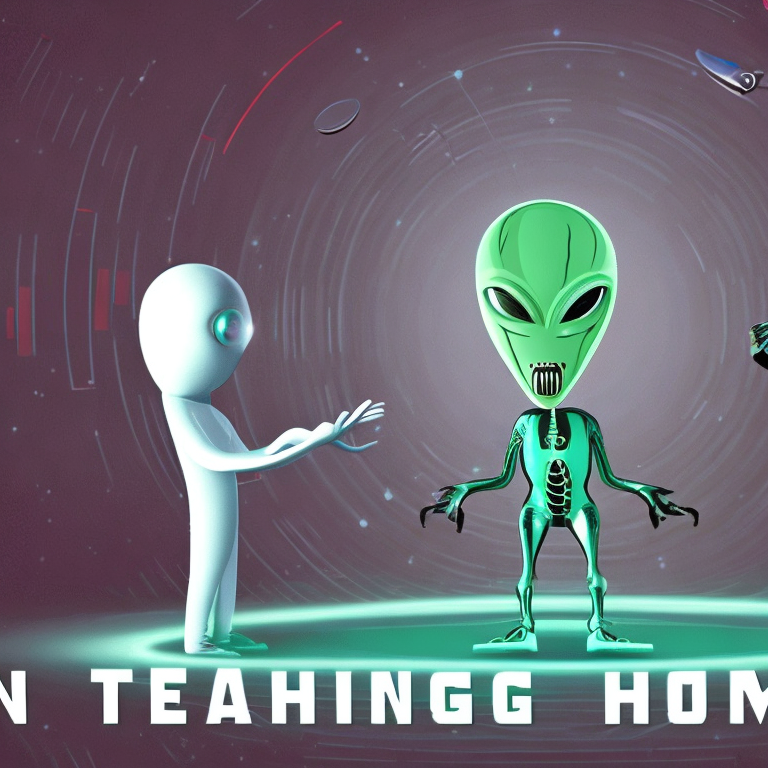

In [10]:
images

In [16]:
synthesiser=pipeline("text-to-speech","microsoft/speecht5_tts",device="cuda")
embeddig_dataset=load_dataset("Matthijs/cmu-arctic-xvectors","default")
# Access the 'validation' split before indexing
speaker_embeddings=torch.tensor(embeddig_dataset["validation"][7306]["xvector"]).unsqueeze(0)

speech=synthesiser("Hi, I am learning LLM Engineering and i am super excited", forward_params={"speaker_embeddings":speaker_embeddings})
sf.write("speech.wav",speech["audio"],speech["sampling_rate"])
Audio("speech.wav")

Device set to use cuda
